### Actividad Grupal: Análisis de Datos del Municipio de Monterrey (DATOS DEL 2015)
### INTEGRANTES GRUPO 3:
#### •	ALDAZ RIVERA DANI ALEXANDER 
#### •	BONILLA VIMOS WASHINGTON RAMIRO
### Parte 4 : Modelado

In [2]:
# importa la libreria de pandas
%matplotlib inline
import pandas as pd

In [3]:
# Ruta de la carpeta que contiene los archivos
df_2015 = pd.read_excel('C:/data/2015.xlsx', sheet_name='Sheet1')

In [4]:
# Asignamos el DataFrame el modelo
data = df_2015.copy()

In [5]:
# Información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10313 entries, 0 to 10312
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   FECHA                       10313 non-null  datetime64[ns]
 1   FACTURA                     10313 non-null  object        
 2   BENEFICIARIO                10313 non-null  object        
 3   RFC                         10313 non-null  object        
 4   CONCEPTO                    10313 non-null  object        
 5   IMPORTE                     10313 non-null  float64       
 6   FECHA DEL PAGO POR CADENAS  448 non-null    datetime64[ns]
 7   FUENTE                      10313 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 644.7+ KB


In [6]:
data.head()

,FECHA,FACTURA,BENEFICIARIO,RFC,CONCEPTO,IMPORTE,FECHA DEL PAGO POR CADENAS,FUENTE
0,2015-01-30,70,"CONSTCOMER, S.A. DE C.V.",CON-060323-F88,EQUIPAMIENTO PARA PARQUES Y PLAZAS,2173840.0,NaT,OBRA PUBLICA Y RECURSOS ETIQUETADOS
1,2015-01-30,73,"CONSTCOMER, S.A. DE C.V.",CON-060323-F88,EQUIPAMIENTO PARA PARQUES Y PLAZAS,12708960.0,NaT,OBRA PUBLICA Y RECURSOS ETIQUETADOS
2,2015-01-30,81,"CONSTCOMER, S.A. DE C.V.",CON-060323-F88,EQUIPAMIENTO PARA PARQUES Y PLAZAS,4346102.4,NaT,OBRA PUBLICA Y RECURSOS ETIQUETADOS
3,2015-01-26,01,SRIA. DE FIN.Y TESORERIA GRAL.DEL EDO.DE N.L.,GEN620601DTA,EX. DE CONTROL Y CONFIANZA PROG. SUBSEMUN 2014,4184000.0,NaT,OBRA PUBLICA Y RECURSOS ETIQUETADOS
4,2015-01-30,25,"IMPULSORA INDUSTRIAL MONTERREY ,S.A.",IIM651101EVA,MATERIAL ELECTRICO,11460.8,NaT,PROVEEDORES


In [9]:
# Llenar los valores faltantes del dataframe
for i, column in enumerate(list(str(d) for d in data.dtypes)):
    if column == "object":
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].mode())
        data[data.columns[i]] = data[data.columns[i]].astype("category").cat.codes
    else:
        data[data.columns[i]] = data[data.columns[i]].fillna(data[data.columns[i]].median())

In [10]:
data.head()

,FECHA,FACTURA,BENEFICIARIO,RFC,CONCEPTO,IMPORTE,FECHA DEL PAGO POR CADENAS,FUENTE
0,2015-01-30,3649,350,107,909,2173840.0,2014-12-04,6
1,2015-01-30,3728,350,107,909,12708960.0,2014-12-04,6
2,2015-01-30,3972,350,107,909,4346102.4,2014-12-04,6
3,2015-01-26,507,1698,194,933,4184000.0,2014-12-04,6
4,2015-01-30,1897,922,234,1133,11460.8,2014-12-04,7


In [11]:
# Utilizar Random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [12]:
y = data.pop("IMPORTE")
X = data.copy()

In [13]:
y.shape

(10313,)

In [14]:
X.shape

(10313, 7)

In [15]:
X

,FECHA,FACTURA,BENEFICIARIO,RFC,CONCEPTO,FECHA DEL PAGO POR CADENAS,FUENTE
0,2015-01-30,3649,350,107,909,2014-12-04,6
1,2015-01-30,3728,350,107,909,2014-12-04,6
2,2015-01-30,3972,350,107,909,2014-12-04,6
3,2015-01-26,507,1698,194,933,2014-12-04,6
4,2015-01-30,1897,922,234,1133,2014-12-04,7
...,...,...,...,...,...,...,...
10308,2015-12-07,5400,1812,308,1484,2014-12-04,9
10309,2015-12-07,5400,1817,308,1484,2014-12-04,9
10310,2015-12-22,5400,1852,308,1297,2014-12-04,9
10311,2015-12-22,5400,1866,308,1297,2014-12-04,9


In [16]:
# Dividir los datos en dos grupos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
print(X_train.dtypes)

FECHA                         datetime64[ns]
FACTURA                                int16
BENEFICIARIO                           int16
RFC                                    int16
CONCEPTO                               int16
FECHA DEL PAGO POR CADENAS    datetime64[ns]
FUENTE                                  int8
dtype: object


In [54]:
X_train = X_train.select_dtypes(exclude=['datetime64'])

In [61]:
X_test = X_test.select_dtypes(exclude=['datetime64'])

In [55]:
clf = RandomForestRegressor(n_estimators=1000, max_depth=4)

In [56]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=1000)

In [59]:
from sklearn.metrics import r2_score

In [62]:
r2_score(y_test, clf.predict(X_test))

0.4899022879614384

## Modelo no supervisado o de clustering

In [63]:
#import warnings
#warnings.filterwarnings("ignore", category=UserWarning, modules="sklearn")
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [64]:
compras_df_c = df_2015.copy()

## la variable adicional es CONCEPTO para el ejemplo

In [65]:
compras_df_c_grupo = compras_df_c.groupby("BENEFICIARIO").agg({"RFC": lambda x: x.nunique(), "IMPORTE":"sum", "FACTURA": lambda x:x.nunique(),"CONCEPTO": lambda x:x.nunique()})

In [66]:
compras_df_cluster = compras_df_c_grupo.reset_index()
compras_df_cluster

,BENEFICIARIO,RFC,IMPORTE,FACTURA,CONCEPTO
0,"NEUROSERVICES COMMUNICATIONS, SA. DE CV.",1,335440.00,1,1
1,"ABA SEGUROS, SA. DE CV. ...",1,4015284.55,1,6
2,"ABA SEGUROS,S.A DE C.V.",1,6118998.84,1,1
3,ABARCA LAYVA CESAR FRANCISCO,1,4299.98,1,1
4,ABDO MOGAS FERNANDO,1,2400.00,1,1
...,...,...,...,...,...
1877,"ZUBEX INDUSTRIAL,S.A. DE C.V. ...",1,72584.40,1,1
1878,ZUÑIGA CORREA ARTURO,1,1718.89,1,1
1879,ZUÑIGA LEIJA JUAN MARTIN,1,205071.65,1,1
1880,ZUÑIGA ROCHA GERARDO,1,935.00,1,1


In [67]:
compras_df_c_grupo_f = compras_df_c_grupo.reset_index().drop(["BENEFICIARIO"], axis=1)

In [68]:
normalizado_compras_df = (compras_df_c_grupo_f-compras_df_c_grupo_f.min())/(compras_df_c_grupo_f.max()-compras_df_c_grupo_f.min())
normalizado_compras_df

,RFC,IMPORTE,FACTURA,CONCEPTO
0,0.0,0.000576,0.0,0.000000
1,0.0,0.006895,0.0,0.042017
2,0.0,0.010508,0.0,0.000000
3,0.0,0.000007,0.0,0.000000
4,0.0,0.000004,0.0,0.000000
...,...,...,...,...
1877,0.0,0.000124,0.0,0.000000
1878,0.0,0.000003,0.0,0.000000
1879,0.0,0.000352,0.0,0.000000
1880,0.0,0.000001,0.0,0.000000


In [69]:
wcss = []

In [70]:
import os
os.environ['LOKY_MAX_CPU_COUNT'] = '4' 

In [71]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(normalizado_compras_df)
    wcss.append(kmeans.inertia_)

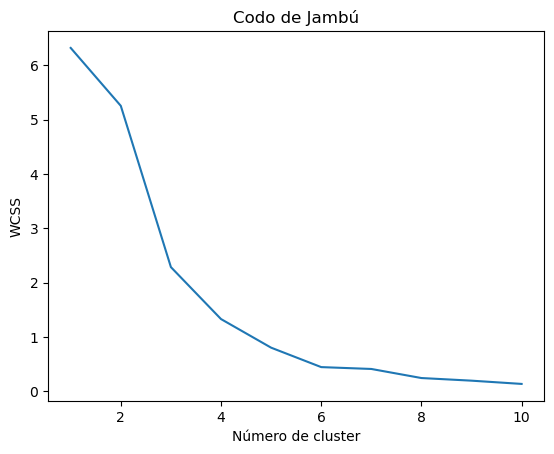

In [40]:
plt.plot(range(1, 11), wcss)
plt.title("Codo de Jambú")
plt.xlabel("Número de cluster")
plt.ylabel("WCSS")
plt.show()


In [72]:
clustering = kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(normalizado_compras_df)

KMeans(n_clusters=3)

In [73]:
compras_df_cluster["KMeans_Cluster"] = clustering.labels_

In [74]:
compras_df_cluster["KMeans_Cluster"].value_counts()

KMeans_Cluster
0    1843
1      37
2       2
Name: count, dtype: int64

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=2)

In [77]:
pca_compras = pca.fit_transform(normalizado_compras_df)

In [78]:
pca_compras_df = pd.DataFrame(data=pca_compras, columns=["componente_1", "componente_2"])

In [79]:
pca_nombres_beneficiario = pd.concat([pca_compras_df, compras_df_cluster["KMeans_Cluster"]], axis=1)

In [80]:
pca_nombres_beneficiario

,componente_1,componente_2,KMeans_Cluster
0,-0.008392,-0.003666,0
1,0.007695,0.027993,0
2,-0.005973,0.001074,0
3,-0.008531,-0.003937,0
4,-0.008532,-0.003939,0
...,...,...,...
1877,-0.008502,-0.003881,0
1878,-0.008532,-0.003939,0
1879,-0.008447,-0.003773,0
1880,-0.008532,-0.003940,0


In [81]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

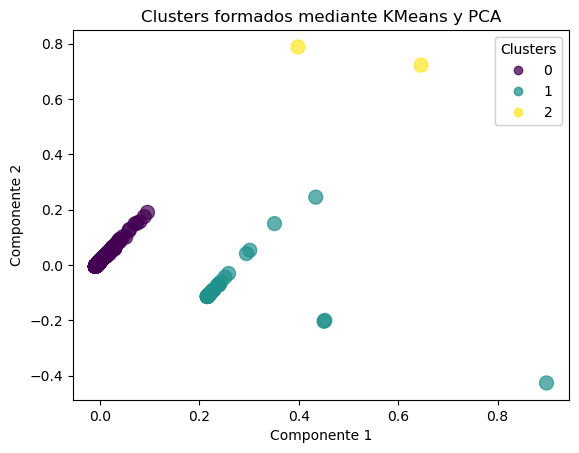

In [82]:
scatter = plt.scatter(pca_nombres_beneficiario['componente_1'],
                      pca_nombres_beneficiario['componente_2'],
                      c = pca_nombres_beneficiario["KMeans_Cluster"],
                      cmap='viridis',
                      s=100,
                      alpha=0.7)

plt.title("Clusters formados mediante KMeans y PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)